In [320]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import ttest_ind, ttest_rel
import numpy as np

In [321]:
data_frame = pd.read_excel('/Users/salvatoreprioli/Documents/ML_/chemometrics/data-sets/Datasets_1.xlsx', sheet_name=0)

In [322]:
# print("The shape of the data is:\n", data_frame.shape)
# print("Data info: \n", data_frame.info())
# print("Data facts: \n", data_frame.describe())
print("Data Keys: \n", data_frame.keys())


Data Keys: 
 Index(['lake', '04Long.', '04Lat.', 'Temperature', 'Depth /m', 'Area /km2',
       'area/depth', 'p_cult', 'p_past', 'p-rice', 'p-urban', 'p_irrig',
       'pdens', 'Chlaμgl', 'SPMmgL', 'SPIM', 'SPOM', 'SPOMSPM', 'SPOMSPIM',
       'PCugL', 'PCChla', 'DOCmgL', 'POCµgl', 'DOC_POC', 'TPmgl',
       'Transparencym', 'Chla/POC', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')


Skewness: 0.037
Kurtosis: -1.33
Skewness: 0.104
Kurtosis: -1.03


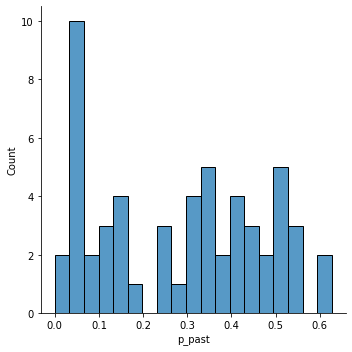

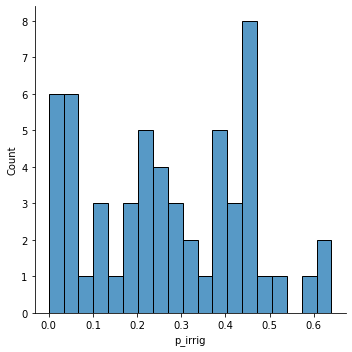

In [323]:
sns.displot(data_frame['p_past'], bins=19)
sns.displot(data_frame['p_irrig'], bins=19)
print("Skewness: %0.3f" % data_frame['p_past'].skew())
print("Kurtosis: %0.2f" % data_frame['p_past'].kurt())
print("Skewness: %0.3f" % data_frame['p_irrig'].skew())
print("Kurtosis: %0.2f" % data_frame['p_irrig'].kurt())


In [326]:
def data_analysis_t_test_table(set1,set2,correlation='pearson'):
    print('Mean {:<0.6f}, {:>0.6f}'.format(data_frame[set1].mean(),data_frame[set2].mean()))
    print('Variance {:<0.6f}, {:>0.6f}'.format(data_frame[set1].var(),data_frame[set2].var(),))
    print('Observations {:<d}, {:>d}'.format(data_frame[set1].count(),data_frame[set2].count(),))
    print('Pearson\'s correlation {:^0.3f}'.format(data_frame[[set1,set2]].corr(method=correlation)[set1].iloc[1]))
    print('Hypothesis Mean Difference {:^0.0f}'.format(data_frame[set1].mean()-data_frame[set2].mean()))
    print('T-Satistic {:^0.6f}'.format(ttest_rel(data_frame[set1],data_frame[set2])[0]))
    print('p-value (one-tail) {:^0.6f}'.format(ttest_rel(data_frame[set1],data_frame[set2])[1]*0.5))
    print('p-value (two-tail) {:^0.6f}'.format(ttest_rel(data_frame[set1],data_frame[set2])[1]))
    print(scipy.stats.t.ppf(q=.05,df=52))

data_analysis_t_test_table('p_past','p_irrig')



Mean 0.283834, 0.269107
Variance 0.034986, 0.032663
Observations 56, 56
Pearson's correlation -0.155
Hypothesis Mean Difference 0
T-Satistic 0.394294
p-value (one-tail) 0.347444
p-value (two-tail) 0.694889
-1.6746891532047912


In [179]:
data_frame = pd.read_excel('/Users/salvatoreprioli/Documents/ML_/chemometrics/data-sets/Datasets_1.xlsx', sheet_name=1)

In [181]:
data_frame.keys()

Index(['Sample ID', 'Sample Date', 'Location', 'Latitude', 'Longitude',
       'Freshwater body type',
       'a) What is the land use in the immediate surroundings?', 'Other',
       'b) Are there any pollution sources in the immediate surroundings? (select all that apply)',
       'Other.1', 'Residential', 'Urban', 'Industrial', 'Other.2', 'Boat',
       'Agri', 'Sum of pollution sources',
       'd) What is the bank vegetation? (select all that apply)', 'Other.3',
       'bankveg1', 'a) Estimate the water flow', 'b) Estimate the water level',
       'a) Estimate the water colour', 'Other.4', 'Colour1',
       'b) Is there any of the following on the water surface?',
       'c) Is the algae...', 'Algae1', 'Nitrate_mg/L', 'Phosphate mg/L',
       'Turbdity_NTU', 'GIS_OBJECTID', 'P_FertGlobal', 'N_FertGlobal',
       'population density', 'ArtificialSurfaces', 'Cropland', 'Grassland',
       'TreeCovered', 'ShrubCovered', 'HerbVegAquac', 'SparseVeg', 'Baresoil',
       'SnowGlaciers', 

In [279]:
nitrate_data_frame = data_frame[['Nitrate_mg/L', 'Colour1']]
nitrate_data_frame = nitrate_data_frame.loc[~nitrate_data_frame['Colour1'].isnull()]

In [280]:
colour = nitrate_data_frame.loc[nitrate_data_frame['Colour1'] == 1] 
not_colour = nitrate_data_frame.loc[nitrate_data_frame['Colour1'] == 0] 

In [281]:
# sns.displot(colour['Nitrate_mg/L'], bins=19)
# sns.displot(not_colour['Nitrate_mg/L'], bins=19)
print("Skewness: %0.2f" % colour['Nitrate_mg/L'].skew())
print("Skewness: %0.2f" % not_colour['Nitrate_mg/L'].skew())

Skewness: 1.98
Skewness: 1.83


In [285]:
colour_log = np.log10(colour['Nitrate_mg/L']) 
not_colour_log = np.log10(not_colour['Nitrate_mg/L'])

In [286]:
print("Skewness: %0.2f" % colour_log.skew())
print("Skewness: %0.2f" % not_colour_log.skew())
# sns.displot(colour_log, bins=19)
# sns.displot(not_colour_log, bins=19)

Skewness: 0.16
Skewness: 0.13


In [313]:
def data_analysis_t_test_table(set1,set2,correlation='pearson'):
    print('Mean {:<0.5f}, {:>0.5f}'.format(set1.mean(), set2.mean()))
    print('Variance {:<0.6f}, {:>0.5f}'.format(set1.var(), set2.var()))
    print('Observations {:<d}, {:>d}'.format(set1.count(), set2.count()))
    print('Pooled Variance {:<0.2f}'.format(np.mean([set1.var(), set2.var()])))
    # print('Pearson\'s correlation {:^0.3f}'.format(data_frame[[set1,set2]].corr(method=correlation)[set1].iloc[1]))
    print('Hypothesis Mean Difference {:^0.0f}'.format(set1.mean()-set2.mean()))
    print('Degrees of freedom {:^d}'.format(set1.count() + set2.count()))
    print('T-Satistic {:^0.6f}'.format(ttest_ind(set1,set2)[0]))
    print('p-value (one-tail) {:^0.2E}'.format(ttest_ind(set1,set2)[1]*0.5))
    print('p-value (two-tail) {:^0.2E}'.format(ttest_ind(set1,set2)[1]))


data_analysis_t_test_table(not_colour_log, colour_log)

Mean -0.06906, -0.15129
Variance 0.392297, 0.40519
Observations 1773, 3279
Pooled Variance 0.40
Hypothesis Mean Difference 0
Degrees of freedom 5052
T-Satistic 4.406962
p-value (one-tail) 5.35E-06
p-value (two-tail) 1.07E-05
